<a href="https://colab.research.google.com/github/salma8989/main/blob/main/W6W7W8_Salma_Nurjihan_Advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objective**
Gustavo just started an e-commerce startup based in Portugal that recently opened an online website to sell their product. Fortunately, Gustavo is launching their website when the covid-19 hits and making them grow faster than ever. However, Gustavo is still not using targeted marketing which hurts their marketing budget as only a fraction of their user comes back to their website. Gustavo needs your help to increase their marketing conversion rate by doing more targeted marketing using customer segmentation so that it will not hurt their budget.

# **Code Preparation**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster

# **Raw Data Preparation**

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1yAB2ChVab9nu5ouAhAYvA8eE-JsDpeQYxko1n9dtoi4/edit#gid=1093336103'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(sheet_url_trf)
print(df.shape)
df.head()

(100648, 14)


,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,customer_unique_id,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,credit_card,1,18.12
1,1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,3,voucher,1,2.00
2,2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,2,voucher,1,18.59
3,3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 3:24:27,2018-08-07 15:27:45,af07308b275d755c9edb36a90c618231,barreiras,BA,1,boleto,1,141.46
4,4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 8:38:49,2018-08-08 8:55:23,2018-08-17 18:06:29,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,credit_card,3,179.12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100648 entries, 0 to 100647
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     100648 non-null  int64  
 1   order_id                       100648 non-null  object 
 2   customer_id                    100648 non-null  object 
 3   order_status                   100648 non-null  object 
 4   order_purchase_timestamp       100648 non-null  object 
 5   order_approved_at              100648 non-null  object 
 6   order_delivered_customer_date  100648 non-null  object 
 7   customer_unique_id             100648 non-null  object 
 8   customer_city                  100648 non-null  object 
 9   customer_state                 100648 non-null  object 
 10  payment_sequential             100648 non-null  int64  
 11  payment_type                   100648 non-null  object 
 12  payment_installments          

In [ ]:
df_cluster = df[['order_id', 'customer_id', 'customer_unique_id', 'customer_city', 'customer_state', 
                 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']].copy()
df_cluster.head()

,order_id,customer_id,customer_unique_id,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,barreiras,BA,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,credit_card,3,179.12


In [ ]:
numerical_column = ['payment_sequential', 'payment_installments',
       'payment_value']

Because the numeric column have different scale, we need to scale it so all numeric feature have diference importance

In [ ]:
scaler = MinMaxScaler()
df_cluster[numerical_column] = scaler.fit_transform(df_cluster[numerical_column])
df_cluster

,order_id,customer_id,customer_unique_id,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,0.00,credit_card,0.041667,0.007281
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,0.08,voucher,0.041667,0.000800
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,0.04,voucher,0.041667,0.007470
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,barreiras,BA,0.00,boleto,0.041667,0.056870
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,0.00,credit_card,0.125000,0.072012
...,...,...,...,...,...,...,...,...,...
100643,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,6359f309b166b0196dbf7ad2ac62bb5a,sao jose dos campos,SP,0.00,credit_card,0.125000,0.034203
100644,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,da62f9e57a76d978d02ab5362c509660,praia grande,SP,0.00,credit_card,0.125000,0.078396
100645,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,737520a9aad80b3fbbdad19b66b37b30,nova vicosa,BA,0.00,credit_card,0.208333,0.108957
100646,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,5097a5312c8b157bb7be58ae360ef43c,japuiba,RJ,0.00,credit_card,0.166667,0.177366


# **Cluster Analysis**

Cluster Analysis:
  - determine cluster number
    - elbow method
    - silhoutte analysis
  - create cluster
  - check agg for each cluster
  - naming

In [ ]:
df_clustering = df_cluster[['payment_sequential', 'payment_installments', 'payment_value']]

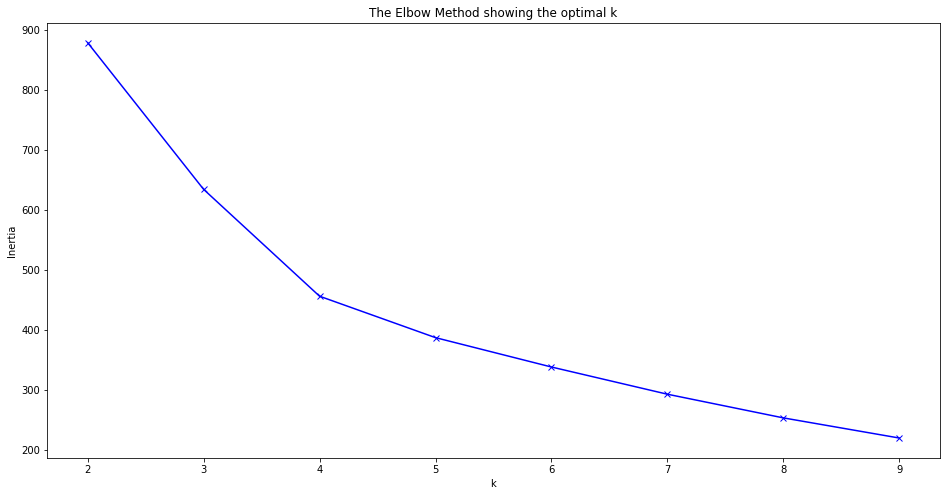

In [ ]:
distortions = []
K = range(2,10)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(df_clustering)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.6409527353146969
For n_clusters = 3 The average silhouette_score is : 0.6439328710258198
For n_clusters = 4 The average silhouette_score is : 0.5456534346764218
For n_clusters = 5 The average silhouette_score is : 0.5619784475972691
For n_clusters = 6 The average silhouette_score is : 0.5624911601046113
For n_clusters = 7 The average silhouette_score is : 0.5155925095219382
For n_clusters = 8 The average silhouette_score is : 0.5320902268590372
For n_clusters = 9 The average silhouette_score is : 0.47684032927256925


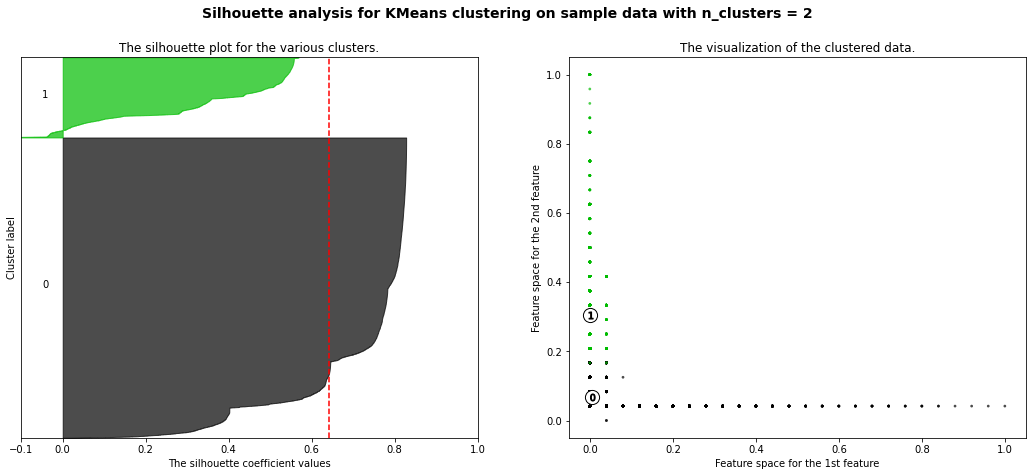

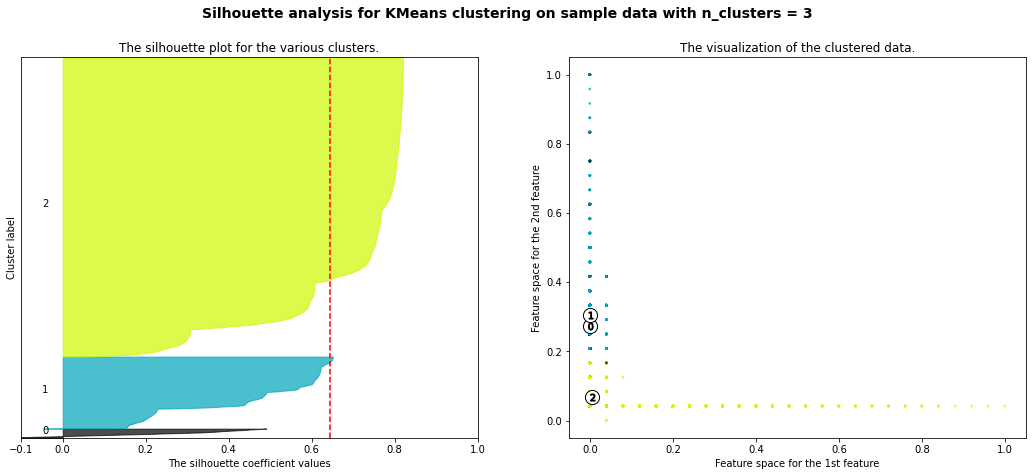

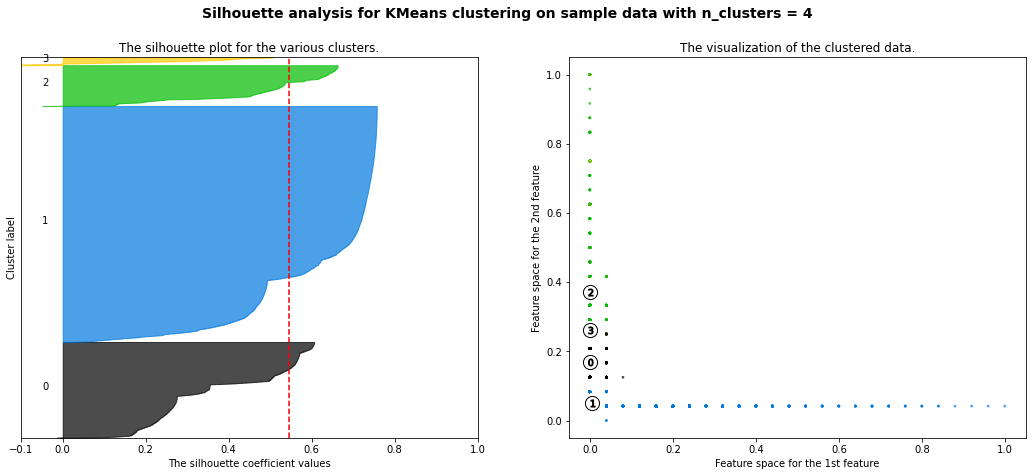

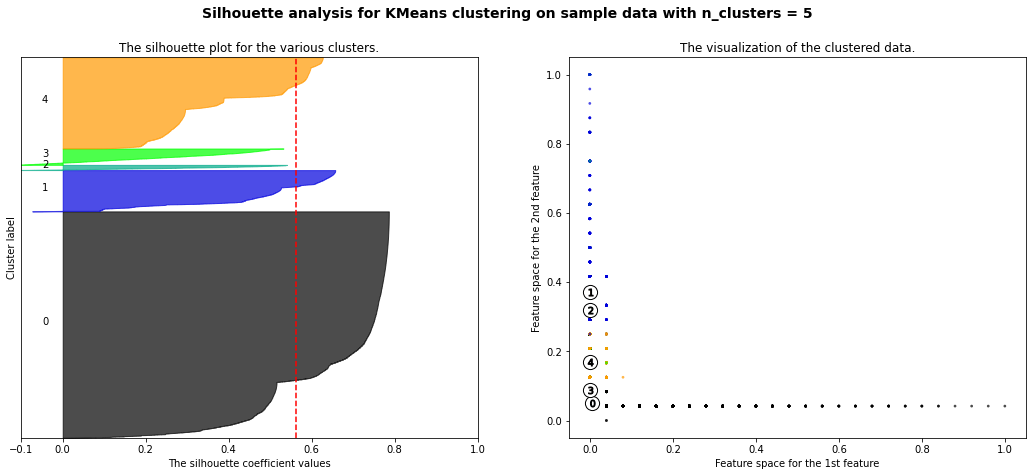

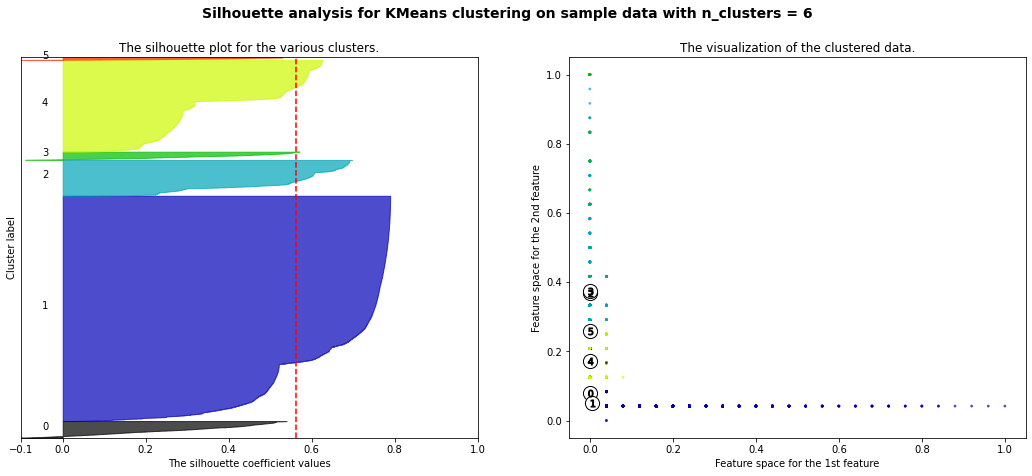

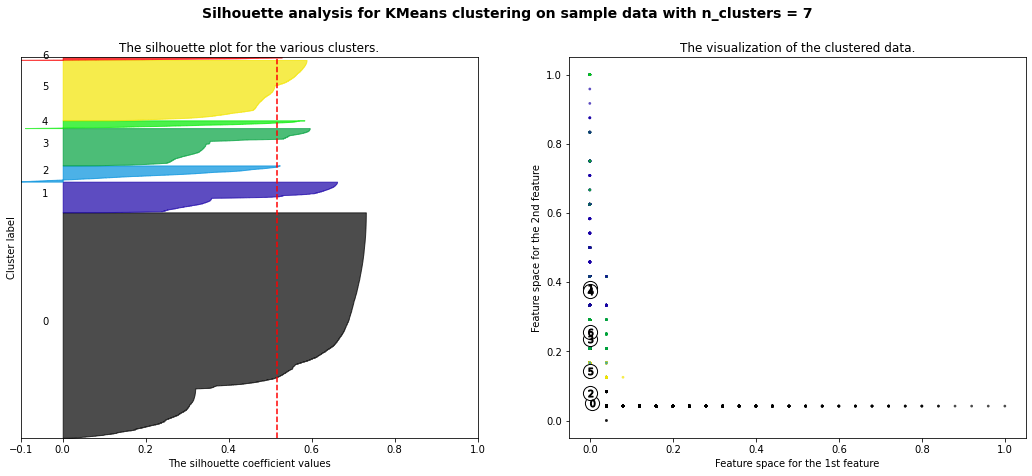

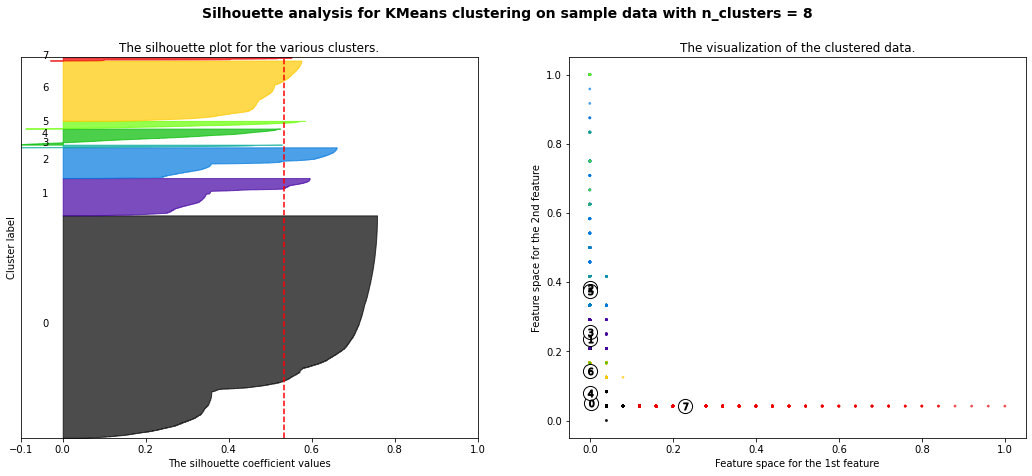

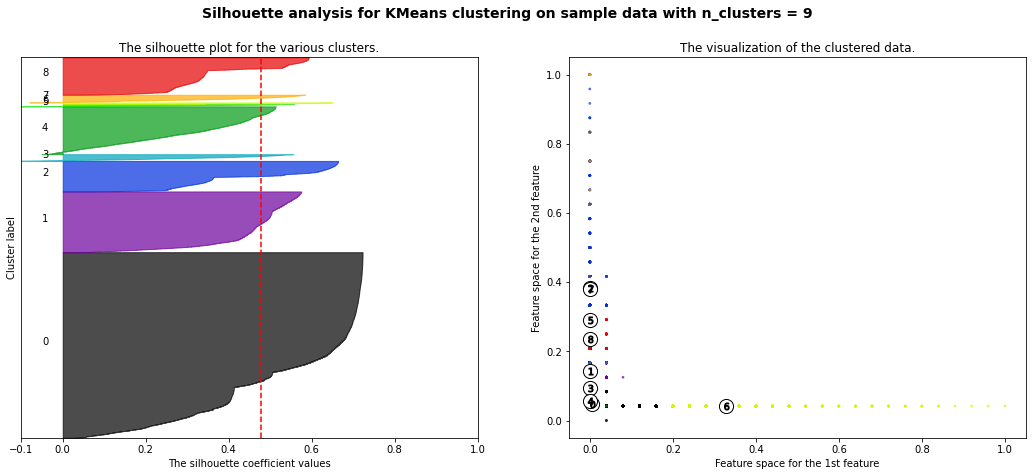

In [ ]:
#from silhoutte import silhoutte_analysis
silhoutte_analysis(df_clustering,list(range(2,10)))

based on elbow method above, we choose cluster = 4

In [ ]:
cluster_model = cluster.KMeans(n_clusters=4)
cluster_model.fit(df_clustering)
cluster_label = cluster_model.labels_
df['cluster'] = cluster_label
df

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,customer_unique_id,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,cluster
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,credit_card,1,18.12,0
1,1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,3,voucher,1,2.00,0
2,2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,2,voucher,1,18.59,0
3,3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 3:24:27,2018-08-07 15:27:45,af07308b275d755c9edb36a90c618231,barreiras,BA,1,boleto,1,141.46,0
4,4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 8:38:49,2018-08-08 8:55:23,2018-08-17 18:06:29,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,credit_card,3,179.12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100643,100643,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 9:54:05,2017-03-09 9:54:05,2017-03-17 15:08:01,6359f309b166b0196dbf7ad2ac62bb5a,sao jose dos campos,SP,1,credit_card,3,85.08,3
100644,100644,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-28 17:37:56,da62f9e57a76d978d02ab5362c509660,praia grande,SP,1,credit_card,3,195.00,3
100645,100645,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-09-21 11:24:17,737520a9aad80b3fbbdad19b66b37b30,nova vicosa,BA,1,credit_card,5,271.01,3
100646,100646,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-25 23:32:54,5097a5312c8b157bb7be58ae360ef43c,japuiba,RJ,1,credit_card,4,441.16,3


In [ ]:
#download the cluster dataset
df.to_csv('cluster 4_dataset.csv')

In [ ]:
df.columns

Index(['Unnamed: 0', 'order_id', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_customer_date', 'customer_unique_id', 'customer_city',
       'customer_state', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'cluster'],
      dtype='object')

In [ ]:
df.groupby(['cluster'])['payment_sequential', 'payment_installments', 'payment_value'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,payment_sequential,payment_installments,payment_value
cluster,,,
0,1.139811,1.191990,104.252270
1,1.004632,8.897823,239.777548
2,1.009108,6.259348,1109.446779
3,1.003827,4.073539,146.891193


In [ ]:
df.groupby(['cluster'])['payment_value'].agg(['count','mean','median','max','min'])

,count,mean,median,max,min
cluster,,,,,
0,62420,104.252270,77.66,753.94,0.01
1,10795,239.777548,190.88,1194.38,37.58
2,2086,1109.446779,975.44,2487.24,625.33
3,25347,146.891193,117.94,686.09,30.00


In [ ]:
df.groupby('cluster')['customer_unique_id'].agg(['count'])

,count
cluster,
0,62420
1,10795
2,2086
3,25347


In [ ]:
df_customer = df.groupby('cluster').agg({'customer_unique_id':pd.Series.count}).reset_index()
df_customer.columns = ['cluster','number_of_customer']
df_customer

,cluster,number_of_customer
0,0,62420
1,1,10795
2,2,2086
3,3,25347


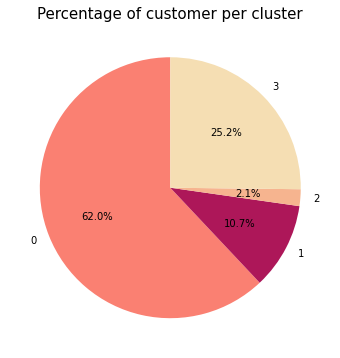

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Percentage of customer per cluster',fontsize=15)
plt.pie(df_customer['number_of_customer'],labels=df_customer['cluster'],autopct='%1.1f%%', startangle = 90, colors = ['#FA8072','#ad1759','#f6b48f','#F5DEB3'])

plt.show()

In [ ]:
df.groupby(['cluster','payment_type'])['payment_value'].agg(['count','mean','median','max','min'])

count         mean   median      max     min
cluster payment_type                                              
0       boleto        18864   124.966993    91.96   753.94   11.62
        credit_card   36622    99.719506    77.24   751.08    0.01
        debit_card     1460   117.530308    88.07   750.21   13.38
        voucher        5474    59.650596    38.98   727.88    0.01
1       credit_card   10795   239.777548   190.88  1194.38   37.58
2       boleto          294  1148.328537  1020.81  2457.44  754.56
        credit_card    1755  1102.484598   968.88  2487.24  625.33
        debit_card       22  1152.322273   934.50  2333.97  766.32
        voucher          15  1099.055333  1009.98  1839.05  789.89
3       credit_card   25347   146.891193   117.94   686.09   30.00

In [ ]:
df.groupby(['cluster','payment_installments'])['payment_value'].agg(['count','mean','median','max','min'])

count         mean    median      max      min
cluster payment_installments                                                
0       0                         2    94.315000    94.315   129.94    58.69
        1                     50432   100.326452    72.750   753.94     0.01
        2                     11986   120.772105   108.865   579.58    20.03
1       6                       117   538.737949   535.370   622.73   464.86
        7                      1518   160.696858   132.290   653.64    69.97
        8                      3822   237.240672   199.335   685.70    37.58
        9                       603   180.006136    99.700   703.10    90.11
        10                     4432   266.835088   213.725   752.04    37.67
        11                       22   125.597273   116.590   198.83   110.43
        12                      117   241.504359   190.090   712.25   121.09
        13                       15   151.826667   136.890   278.00   130.57
        14                       14   169.360000   146.720   417.45   139.98
        15                       65   313.558769   246.230   892.44   151.93
        16                        5   292.694000   167.370   651.05   160.12
        17                        7   174.522857   175.040   177.99   170.00
        18                       23   357.578261   276.080   987.80   180.76
        20                       13   449.414615   450.240   885.36   206.99
        21                        3   243.700000   216.050   303.02   212.03
        22                        1   228.710000   228.710   228.71   228.71
        23                        1   236.480000   236.480   236.48   236.48
        24                       17   561.222353   588.580  1194.38   241.42
2       1                       448  1151.853795  1019.945  2457.44   754.46
        2                        59  1056.250339   971.100  2105.57   711.07
        3                        85   978.461765   858.650  2389.78   688.35
        4                       129  1018.394264   837.390  2480.58   657.63
        5                       126   985.896587   881.200  2115.79   635.75
        6                       167   962.854012   826.990  2223.12   625.33
        7                        45  1037.896667   787.530  2094.44   667.99
        8                       305  1060.824426   918.180  2452.12   689.38
        9                        15   920.166667   918.160  1225.99   720.98
        10                      682  1202.754032  1039.150  2487.24   753.54
        12                       11  1206.209091  1225.050  1543.25   885.99
        15                        6  1335.358333  1380.410  1635.64  1014.61
        18                        4  1227.687500  1228.950  1232.85  1220.00
        20                        3  1475.386667  1221.520  2022.33  1182.31
        24                        1  1440.100000  1440.100  1440.10  1440.10
3       2                        30   622.949000   618.265   686.09   583.42
        3                     10076   134.633759   109.010   675.77    30.00
        4                      6759   146.878146   114.790   654.41    40.00
        5                      4964   159.388124   123.065   628.86    49.99
        6                      3518   160.329963   133.760   463.34    59.99

**Summary**

**Cluster 0**: 62,420 customers (62%), average payment value 104.25, average payment installment 1, range payment value 6 - 745 with 4 payment type (mostly credit card) >> low spending one time payment

**Cluster 1**: 10,795 customers (10.7%), average payment value 239.77, average payment installment 8, range payment value 37-1194 with payment method credit card >> middle spending 8 times payment

**Cluster 2** : 2,086 customers (2.1%), average payment value 1109.44, average payment installment 6, range payment value 733-2279 with 4 payment method (mostly credit card) >> high spending 6 times payment

**Cluster 3** : 25,347 customers (25.2%), average payment value 146.89, average payment installment 4, range payment value 30-686 with payment method credit card >> low spending 4 times payment

**Recommendation**

**Cluster 0** is the biggest customer with lower spending and one installments. It seems that customer likes to purchase daily expense. Marketing can send email that offer voucher to use, recommendation daily product to repurchase, promotion buy 1 get 1 to increase transaction.

**Cluster 1** is the customer who like to use many installments with medium spending. Marketing can send email that offer special discount with min installments to increase transaction.

**Cluster 2** is the lowest customer with high spending and 6 installments. Marketing can send email that offer premium product with special price/discount, offer unique product within customer interest to increase transaction.

**Cluster 3** is the customer with low spending and 4 installments. Marketing can send email that offer voucher to use, special discount with min installments to increase transaction.